<a href="https://colab.research.google.com/github/AlanItzep/AplicacionJS/blob/master/Temperaturas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediccion de la temperatura para mañana

## Roadmap  
1. Indica la pregunta y determina los datos requeridos.  
2. Obten los datos en un formato accesible.
3. Identifica y corrije los puntos de datos faltantes/ anomalias (missing data /anomalies)segun sea necesario  
4. Prepara los datos para el modelo
5. Establece un **baseline model** que pretendes superar.
6. Entrena el modelo en los datos de ***entrenamiento(train)***
7. Hacer predicciones sobre los atos de ***prueba(test)***  
8. Compara las predicciones con los objetivos de conjutno de prueba conocidos y calcule las métricas de rendimiento
9. Si el rendimiento no es satisfactorio...   
  * Ajusta el modelo  
  * Adquire mas datos  
  * Prueba una tecnica de modelado diferente

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving temps.csv to temps (1).csv
User uploaded file "temps.csv" with length 14436 bytes


In [0]:
import pandas as pd

In [0]:
features = pd.read_csv('temps.csv')
features.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


## Missing Data/ Anomalies

In [0]:
print("La Shape de nuestro conjunto de datos es: ", features.shape)

La Shape de nuestro conjunto de datos es:  (348, 12)


In [0]:
features.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


In [0]:
import datetime

In [0]:
years = features['year']
months = features['month']
days = features['day']

In [0]:
dates = [str(int(year))+ '-' + str(int(month))+ '-' + str(int(day)) for year, month,
             day in zip (years, months, days)]
dates = [datetime.datetime.strptime(date,'%Y-%m-%d')for date in dates]

In [0]:
%matplotlib inline 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
#features.hist(bins=50, figsize=(20,15))
#plt.show()

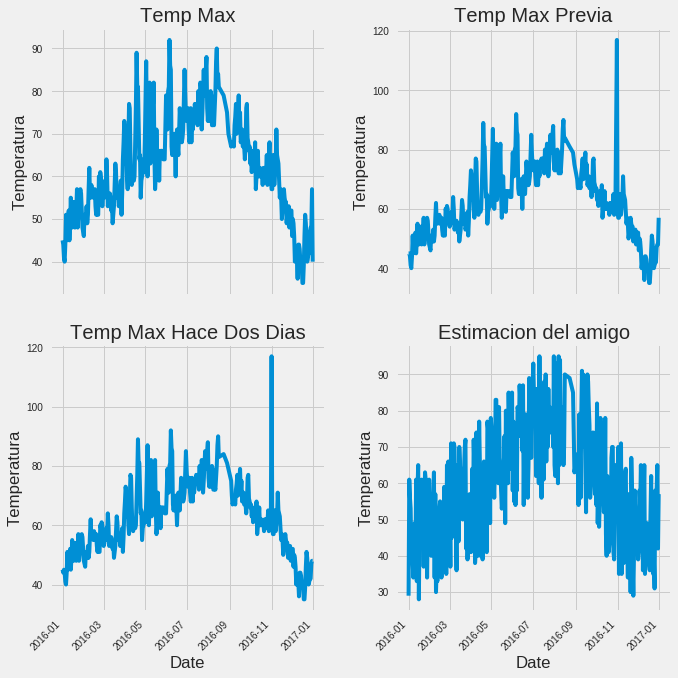

In [0]:
# Set up the plotting layout
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(10,10))
fig.autofmt_xdate(rotation = 45)

# Actual max tempertature measurement
ax1.plot(dates, features['actual'])
ax1.set_xlabel(''); ax1.set_ylabel('Temperatura');ax1.set_title('Temp Max')

# Temperature form 1 day ago
ax2.plot(dates, features['temp_1'])
ax2.set_xlabel(''); ax2.set_ylabel('Temperatura');ax2.set_title('Temp Max Previa')

# Temperature from 2 days ago
ax3.plot(dates, features['temp_2'])
ax3.set_xlabel('Date'); ax3.set_ylabel('Temperatura');ax3.set_title('Temp Max Hace Dos Dias')

# Friend Estimate
ax4.plot(dates, features['friend'])
ax4.set_xlabel('Date'); ax4.set_ylabel('Temperatura');ax4.set_title('Estimacion del amigo')

plt.tight_layout(pad=2)


### Data preparation

##### One-Hot Encoding  
El primer paso se conoce como One-Hot Encoding. Esto proceso toma las variables categóricas, como por ejemplo los dias de lasemana y los convierte en una representacion numerica sin un orden arbitrario.  
Lo que las computadoras saben son los numeros y para el aprendizaje automatico debemos acomodarlos. ¿Opciones?:  
* Asignar a los dias de la semana un numero del 1-7, **MALA IDEA**  esto llevaria a que el algoritmo otorgue mas importancia al dia domingo porque tendria el valor numerico mas alto. 
* En lugar de esto cambiamos la columna (una) de los dias de la semana a siete **columnas de datos binarios**. 

In [0]:
features = pd.get_dummies(features)

In [0]:
features.head()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,46,46,46,41,0,0,0,0,0,1,0


In [0]:
print('Shape de las features despues del one-hot encoding: ',features.shape)

Shape de las features despues del one-hot encoding:  (348, 18)


### Features /Labels y convertir la Data to Arrays  
features -> labels
max_temp -> el valor que debemos predecir   
Las demas features -> Seran las columans que usara el modelo para hace la prediccion  


In [0]:
# Use numpy to convert to arrays
import numpy as np

# Labels are the values we want to predict
labels = np.array(features['actual'])

# Remove the labels form the features
# axis 1 refers to the columns
features = features.drop('actual', axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)

### Training and Testing sets

In [0]:
# using Scikit-Learn to split into training and testing sets
from sklearn.model_selection import train_test_split

#Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, test_size = 0.25,random_state = 42)

In [0]:
print('Trining Features Shape: ', train_features.shape)
print('Trining Features Shape: ', train_labels.shape)
print('Trining Features Shape: ', test_features.shape)
print('Trining Features Shape: ', test_labels.shape)

Trining Features Shape:  (261, 17)
Trining Features Shape:  (261,)
Trining Features Shape:  (87, 17)
Trining Features Shape:  (87,)


### Summary  
1. Variables one-hot encoding   
2. Dividir los datos en features y labels (X & y, y la variable a predecir y X las demas features)
3. Convertir a Arrays  
4. Dividir datos en conjunto de Train y Test  

¿Qué más se hubiera podido realizar?  
* Remover outliers
* Imputting missing values (NA´s)
* Convertir variables temporales en representaciones cícliclas  

En terminos simples, se trata de tomar datos legibles por humanos y ponerlos en una forma que pueda ser entendida por un modelo de aprendizaje automatico (Machine Learning).

## Establecer un Baseline  
Antes de hacer y evaluar predicciones debemos establecer un baseline, que seria un medida sensata que esperamos superar en nuestro modelo. Si el modelo no supera la baseline, sera un fracaso y se deberia probar un modelo diferente o admitir que el Machine Learning no es el adecuado para nuestro problema.

In [0]:
# The baseline predictions are the historical averages
baseline_preds = test_features[:, feature_list.index('average')]

# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2), ' degree.')

Average baseline error:  5.06  degree.


In [0]:
# The baseline predictions are the historical averages
baseline_preds_train = train_features[:, feature_list.index('average')]

# Baseline errors, and display average baseline error
baseline_errors_train = abs(baseline_preds_train - train_labels)
print('Average baseline error: ', round(np.mean(baseline_errors_train), 2), ' degree.')

Average baseline error:  4.89  degree.


## Train Model  
Despues de todo el trabajo de preparacion de datos, se crea y entrena el modelo, que es bastante facil usando Scikit-learn. 
* Importamos el modelo de regresión de Random Forest desde Scikit-learn y creamos una instancia del modelo y ajustamos("fit"- nombre  en Scikit-learn para entrenamiento) el modelo en los datos de entrenamiento.  

In [0]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model
rf = RandomForestRegressor(n_estimators = 1000, random_state = 1234)

# Train the model on the training data
rf.fit(train_features, train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=1234, verbose=0, warm_start=False)

### Hacer predicciones sobre el conjunto de prueba  (Test Data)
El modelo ha sido entrenado para aprender las relaciones entre features y targets. El siguiente paso es averiguar que tan bueno es el modelo.  
Para hacer esto, hacemos predicciones sobre las  **features de test** (el modelo nunca puede ver las las respuesta de train).  
Luego se compara las predicciones con las respuestas conocidas. Al realizar la regresión, debemos asegurarnos de utilizar el error absoluto porque esperamos que algumas de nuestra respuestas sean bajas y toras sean altas.  

*Estamos interesasod en cuan lejos esta nuestra prediccion promedio del valor real (aqui es dodnde nos sera util la baseline)*

In [0]:
# Use the forest's predict methos on the test data
predictions = rf.predict(test_features)

# Calculate the absolute errors 
errors = abs(predictions - test_labels)

# Print out the mean absolute error (mae)
print('Mean Absolute Error: ', round(np.mean(errors),2), 'degrees.')

Mean Absolute Error:  3.89 degrees.


Esto es mas que una mejora a un grado de la baseline. A primera vista pare no ser muy significativo, pero es casi un 25% mejor que la baseline, y segun el sector y el problema, podria representar millones de dolares para una empresa.

### Deternimar las metricas de rendimiento  


In [0]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy: ', round(accuracy, 2), '%.')

Accuracy:  93.91 %.


In [0]:
from sklearn import metrics
print(metrics.accuracy_score(test_features, predictions))

ValueError: ignored

In [0]:
from sklearn.metrics import classification_report 
from sklearn import metrics
print(metrics.confusion_matrix(test_labels, predictions))

ValueError: ignored

In [0]:

from sklearn import metrics
predictions_class = binarize(predictions, 0.25)
print(metrics.confusion_matrix(test_labels, predictions_class[:,1]))

ValueError: ignored